In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [68]:
np.set_printoptions(precision=3)


In [74]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/JohnMHoyt24/mental-health-analysis/main/master.csv')

diabetes.head(10)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,796,Generation X


In [75]:
features = diabetes.drop(['country', 'sex', 'age', 'country-year', 'HDI for year', 'generation'], axis=1)
features.head(10)


,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,1987,21,312900,6.71,796
1,1987,16,308000,5.19,796
2,1987,14,289700,4.83,796
3,1987,1,21800,4.59,796
4,1987,9,274300,3.28,796
5,1987,1,35600,2.81,796
6,1987,6,278800,2.15,796
7,1987,4,257200,1.56,796
8,1987,1,137500,0.73,796
9,1987,0,311000,0.00,796


In [76]:
target = diabetes['population']
target.head(10)

0    312900
1    308000
2    289700
3     21800
4    274300
5     35600
6    278800
7    257200
8    137500
9    311000
Name: population, dtype: int64

In [77]:
features.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [78]:
from sklearn.preprocessing import MinMaxScaler


In [79]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(features)


In [80]:
rescaled_features.shape

(27820, 5)

In [81]:
rescaled_features[0:5]

array([[6.452e-02, 9.401e-04, 7.137e-03, 2.983e-02, 4.322e-03],
       [6.452e-02, 7.163e-04, 7.025e-03, 2.307e-02, 4.322e-03],
       [6.452e-02, 6.267e-04, 6.607e-03, 2.147e-02, 4.322e-03],
       [6.452e-02, 4.477e-05, 4.913e-04, 2.040e-02, 4.322e-03],
       [6.452e-02, 4.029e-04, 6.256e-03, 1.458e-02, 4.322e-03]])

In [83]:
rescaled_features_df = pd.DataFrame(rescaled_features, columns=features.columns)

rescaled_features_df.describe()
#Notice that the mean, std, min, 25%, 50%, 75%, and max are all values between 0 and 1.

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000
mean,0.524464,0.010859,0.042107,0.056968,0.131763
std,0.273195,0.040382,0.089300,0.084285,0.149781
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.322581,0.000134,0.002219,0.004089,0.025345
50%,0.548387,0.001119,0.009813,0.026626,0.072331
75%,0.741935,0.005864,0.033920,0.073877,0.195264
max,1.000000,1.000000,1.000000,1.000000,1.000000


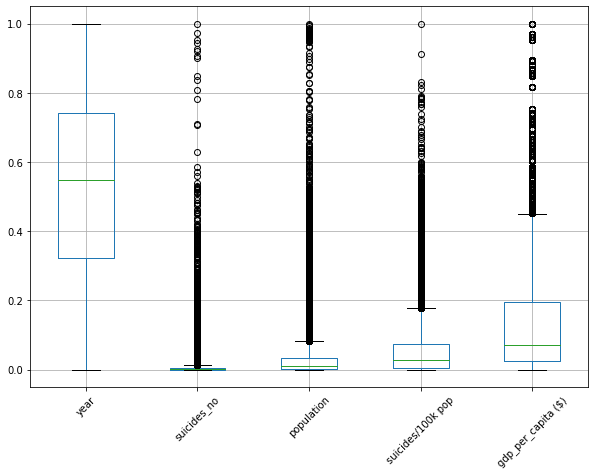

In [84]:
rescaled_features_df.boxplot(figsize=(10, 7), rot=45)

plt.show() #This boxplot has spotted numerous outliers in the data

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

scaler = scaler.fit(features)

standardized_features = scaler.transform(features)


In [87]:
standardized_features[0:5] #Negative values are below the mean; Positive values are above the mean

array([[-1.684, -0.246, -0.392, -0.322, -0.851],
       [-1.684, -0.251, -0.393, -0.402, -0.851],
       [-1.684, -0.253, -0.398, -0.421, -0.851],
       [-1.684, -0.268, -0.466, -0.434, -0.851],
       [-1.684, -0.259, -0.401, -0.503, -0.851]])

In [88]:
standardized_features_df = pd.DataFrame(standardized_features, columns=features.columns)

standardized_features_df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,2.782000e+04,2.782000e+04,2.782000e+04,2.782000e+04,2.782000e+04
mean,-2.688847e-15,8.507383e-16,-1.626076e-17,-3.301373e-15,-3.650726e-16
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-1.919774e+00,-2.689200e-01,-4.715370e-01,-6.759128e-01,-8.797192e-01
25%,-7.389830e-01,-2.655942e-01,-4.466833e-01,-6.273926e-01,-7.105044e-01
50%,8.757034e-02,-2.412048e-01,-3.616434e-01,-3.600040e-01,-3.968005e-01
75%,7.960446e-01,-1.236923e-01,-9.168636e-02,2.006154e-01,4.239654e-01
max,1.740677e+00,2.449518e+01,1.072688e+01,1.118886e+01,5.796800e+00


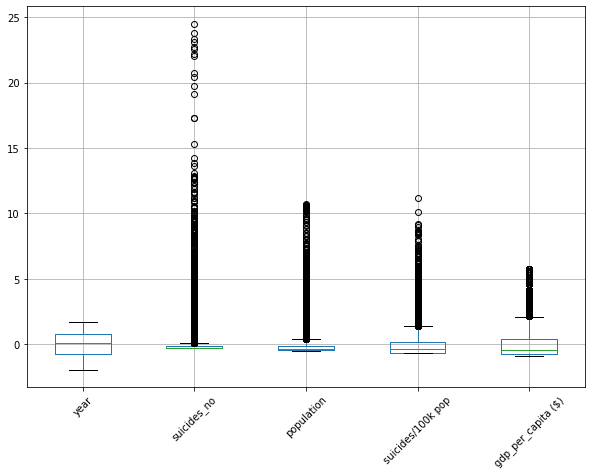

In [89]:
standardized_features_df.boxplot(figsize= (10, 7), rot=45)

plt.show()